In [ ]:
# Installing required libraries
install.packages("dplyr")
install.packages("corrplot")
install.packages("library")
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘library’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Data Cleaning and Initial Exploration( Anmol Deep)

In [ ]:
#Loading the dataset
BankChurners <- read.csv("BankChurners.csv")

In [ ]:
head(BankChurners)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,⋯,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,⋯,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,⋯,12691,777,11914,1.335,1144,42,1.625,0.061,9.3448e-05,0.99991
2,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,⋯,8256,864,7392,1.541,1291,33,3.714,0.105,5.6861e-05,0.99994
3,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,⋯,3418,0,3418,2.594,1887,20,2.333,0.000,2.1081e-05,0.99998
4,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,⋯,3313,2517,796,1.405,1171,20,2.333,0.760,1.3366e-04,0.99987
5,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,⋯,4716,0,4716,2.175,816,28,2.500,0.000,2.1676e-05,0.99998
6,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,⋯,4010,1247,2763,1.376,1088,24,0.846,0.311,5.5077e-05,0.99994


In [ ]:
# Dropping irrelevant columns from the BankChurners data frame
columns_to_drop <- c(
  'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
  'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
)

BankChurners <- BankChurners[, !(colnames(BankChurners) %in% columns_to_drop)]

In [ ]:
head(BankChurners)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,⋯,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,⋯,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
1,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,⋯,1,3,12691,777,11914,1.335,1144,42,1.625,0.061
2,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,⋯,1,2,8256,864,7392,1.541,1291,33,3.714,0.105
3,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,⋯,1,0,3418,0,3418,2.594,1887,20,2.333,0.000
4,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,⋯,4,1,3313,2517,796,1.405,1171,20,2.333,0.760
5,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,⋯,1,0,4716,0,4716,2.175,816,28,2.500,0.000
6,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,⋯,1,2,4010,1247,2763,1.376,1088,24,0.846,0.311


In [ ]:
#Summary statistics of the BankChurners dataset
summary(BankChurners)

   CLIENTNUM         Attrition_Flag      Customer_Age      Gender         
 Min.   :708082083   Length:10127       Min.   :26.00   Length:10127      
 1st Qu.:713036770   Class :character   1st Qu.:41.00   Class :character  
 Median :717926358   Mode  :character   Median :46.00   Mode  :character  
 Mean   :739177606                      Mean   :46.33                     
 3rd Qu.:773143533                      3rd Qu.:52.00                     
 Max.   :828343083                      Max.   :73.00                     
 Dependent_count Education_Level    Marital_Status     Income_Category   
 Min.   :0.000   Length:10127       Length:10127       Length:10127      
 1st Qu.:1.000   Class :character   Class :character   Class :character  
 Median :2.000   Mode  :character   Mode  :character   Mode  :character  
 Mean   :2.346                                                           
 3rd Qu.:3.000                                                           
 Max.   :5.000                 

In [ ]:
str(BankChurners)

'data.frame':	10127 obs. of  21 variables:
 $ CLIENTNUM               : int  768805383 818770008 713982108 769911858 709106358 713061558 810347208 818906208 710930508 719661558 ...
 $ Attrition_Flag          : chr  "Existing Customer" "Existing Customer" "Existing Customer" "Existing Customer" ...
 $ Customer_Age            : int  45 49 51 40 40 44 51 32 37 48 ...
 $ Gender                  : chr  "M" "F" "M" "F" ...
 $ Dependent_count         : int  3 5 3 4 3 2 4 0 3 2 ...
 $ Education_Level         : chr  "High School" "Graduate" "Graduate" "High School" ...
 $ Marital_Status          : chr  "Married" "Single" "Married" "Unknown" ...
 $ Income_Category         : chr  "$60K - $80K" "Less than $40K" "$80K - $120K" "Less than $40K" ...
 $ Card_Category           : chr  "Blue" "Blue" "Blue" "Blue" ...
 $ Months_on_book          : int  39 44 36 34 21 36 46 27 36 36 ...
 $ Total_Relationship_Count: int  5 6 4 3 5 3 6 2 5 6 ...
 $ Months_Inactive_12_mon  : int  1 1 1 4 1 1 1 2 2 3 ...
 $ Co

In [ ]:
# Getting the count of missing values for each column in the BankChurners data frame
missing_counts <- colSums(is.na(BankChurners))

# Printing the count of missing values for each column
print(missing_counts)

               CLIENTNUM           Attrition_Flag             Customer_Age 
                       0                        0                        0 
                  Gender          Dependent_count          Education_Level 
                       0                        0                        0 
          Marital_Status          Income_Category            Card_Category 
                       0                        0                        0 
          Months_on_book Total_Relationship_Count   Months_Inactive_12_mon 
                       0                        0                        0 
   Contacts_Count_12_mon             Credit_Limit      Total_Revolving_Bal 
                       0                        0                        0 
         Avg_Open_To_Buy     Total_Amt_Chng_Q4_Q1          Total_Trans_Amt 
                       0                        0                        0 
          Total_Trans_Ct      Total_Ct_Chng_Q4_Q1    Avg_Utilization_Ratio 
            

Classification Task 1 - Amayomi Stephanie Amatesiro (22222019)

Data preparation and feature selection

In [ ]:
# Loading required library
library(dplyr)

# Converting the Attrition_Flag to binary (0 for Existing Customer, 1 for Churned)
BankChurners <- BankChurners %>%
  mutate(Attrition_Flag = ifelse(Attrition_Flag == "Existing Customer", 0, ifelse(Attrition_Flag == "Attrited Customer", 1, NA)))

# Verifying the conversion
head(BankChurners$Attrition_Flag)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[1] 0 0 0 0 0 0

In [ ]:
# Loading required library
install.packages("tidyr")
library(tidyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Defining label encoding mapping for Education_Level (ordinal variable)
education_mapping <- c(
  "Unknown" = 0, "Uneducated" = 1, "High School" = 2,
  "College" = 3, "Graduate" = 4, "Post-Graduate" = 5, "Doctorate" = 6
)

# Applying label encoding to Education_Level in the original dataset
BankChurners$Education_Level <- education_mapping[BankChurners$Education_Level]

# Verifying the result
head(BankChurners)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,⋯,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
,<int>,<dbl>,<int>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<int>,⋯,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
1,768805383,0,45,M,3,2,Married,$60K - $80K,Blue,39,⋯,1,3,12691,777,11914,1.335,1144,42,1.625,0.061
2,818770008,0,49,F,5,4,Single,Less than $40K,Blue,44,⋯,1,2,8256,864,7392,1.541,1291,33,3.714,0.105
3,713982108,0,51,M,3,4,Married,$80K - $120K,Blue,36,⋯,1,0,3418,0,3418,2.594,1887,20,2.333,0.000
4,769911858,0,40,F,4,2,Unknown,Less than $40K,Blue,34,⋯,4,1,3313,2517,796,1.405,1171,20,2.333,0.760
5,709106358,0,40,M,3,1,Married,$60K - $80K,Blue,21,⋯,1,0,4716,0,4716,2.175,816,28,2.500,0.000
6,713061558,0,44,M,2,4,Married,$40K - $60K,Blue,36,⋯,1,2,4010,1247,2763,1.376,1088,24,0.846,0.311


In [ ]:
# Defining label encoding mapping for Card_Category (ordinal variable)
card_category_mapping <- c(
  "Blue" = 0, "Silver" = 1, "Gold" = 2, "Platinum" = 3
)

# Applying label encoding to Card_Category in the original dataset
BankChurners$Card_Category <- card_category_mapping[BankChurners$Card_Category]

# Verifying the result
head(BankChurners)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,⋯,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
,<int>,<dbl>,<int>,<chr>,<int>,<dbl>,<chr>,<chr>,<dbl>,<int>,⋯,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
1,768805383,0,45,M,3,2,Married,$60K - $80K,0,39,⋯,1,3,12691,777,11914,1.335,1144,42,1.625,0.061
2,818770008,0,49,F,5,4,Single,Less than $40K,0,44,⋯,1,2,8256,864,7392,1.541,1291,33,3.714,0.105
3,713982108,0,51,M,3,4,Married,$80K - $120K,0,36,⋯,1,0,3418,0,3418,2.594,1887,20,2.333,0.000
4,769911858,0,40,F,4,2,Unknown,Less than $40K,0,34,⋯,4,1,3313,2517,796,1.405,1171,20,2.333,0.760
5,709106358,0,40,M,3,1,Married,$60K - $80K,0,21,⋯,1,0,4716,0,4716,2.175,816,28,2.500,0.000
6,713061558,0,44,M,2,4,Married,$40K - $60K,0,36,⋯,1,2,4010,1247,2763,1.376,1088,24,0.846,0.311


In [ ]:
unique(BankChurners$Income_Category)


[1] "$60K - $80K"    "Less than $40K" "$80K - $120K"   "$40K - $60K"   
[5] "$120K +"        "Unknown"

In [ ]:
# Defining label encoding mapping for Income_Category (ordinal variable)
income_category_mapping <- c(
  "Unknown" = 0,
  "Less than $40K" = 1,
  "$40K - $60K" = 2,
  "$60K - $80K" = 3,
  "$80K - $120K" = 4,
  "$120K +" = 5
)

# Applying label encoding to Income_Category in the original dataset
BankChurners$Income_Category <- income_category_mapping[BankChurners$Income_Category]

# Verifying the result
head(BankChurners)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,⋯,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
,<int>,<dbl>,<int>,<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<int>,⋯,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
1,768805383,0,45,M,3,2,Married,3,0,39,⋯,1,3,12691,777,11914,1.335,1144,42,1.625,0.061
2,818770008,0,49,F,5,4,Single,1,0,44,⋯,1,2,8256,864,7392,1.541,1291,33,3.714,0.105
3,713982108,0,51,M,3,4,Married,4,0,36,⋯,1,0,3418,0,3418,2.594,1887,20,2.333,0.000
4,769911858,0,40,F,4,2,Unknown,1,0,34,⋯,4,1,3313,2517,796,1.405,1171,20,2.333,0.760
5,709106358,0,40,M,3,1,Married,3,0,21,⋯,1,0,4716,0,4716,2.175,816,28,2.500,0.000
6,713061558,0,44,M,2,4,Married,2,0,36,⋯,1,2,4010,1247,2763,1.376,1088,24,0.846,0.311


In [ ]:
#Checking the first 20 values of the Income_category column
head(BankChurners$Income_Category, 20)

[1] 3 1 4 1 3 2 5 3 3 4 5 2 4 3 1 4 4 4 2 0

In [ ]:
#Checking the first 20 values of the Card_category column
head(BankChurners$Card_Category, 20)

[1] 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0

In [ ]:
# Specifying categorical variables to encode
categorical_vars <- c("Gender", "Marital_Status")

# Creating one-hot encoded matrix
one_hot_matrix <- model.matrix(~ . - 1, data = BankChurners[categorical_vars])

# Combining the one-hot encoded matrix with the original dataset
encoded_data <- cbind(BankChurners, one_hot_matrix)

# Displaying the first few rows of the encoded dataset
head(encoded_data)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,⋯,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,GenderF,GenderM,Marital_StatusMarried,Marital_StatusSingle,Marital_StatusUnknown
,<int>,<dbl>,<int>,<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<int>,⋯,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,768805383,0,45,M,3,2,Married,3,0,39,⋯,1.335,1144,42,1.625,0.061,0,1,1,0,0
2,818770008,0,49,F,5,4,Single,1,0,44,⋯,1.541,1291,33,3.714,0.105,1,0,0,1,0
3,713982108,0,51,M,3,4,Married,4,0,36,⋯,2.594,1887,20,2.333,0.000,0,1,1,0,0
4,769911858,0,40,F,4,2,Unknown,1,0,34,⋯,1.405,1171,20,2.333,0.760,1,0,0,0,1
5,709106358,0,40,M,3,1,Married,3,0,21,⋯,2.175,816,28,2.500,0.000,0,1,1,0,0
6,713061558,0,44,M,2,4,Married,2,0,36,⋯,1.376,1088,24,0.846,0.311,0,1,1,0,0


In [ ]:
# Checking for missing values in the data
missing_values <- sapply(encoded_data, function(x) sum(is.na(x)))
print(missing_values)

               CLIENTNUM           Attrition_Flag             Customer_Age 
                       0                        0                        0 
                  Gender          Dependent_count          Education_Level 
                       0                        0                        0 
          Marital_Status          Income_Category            Card_Category 
                       0                        0                        0 
          Months_on_book Total_Relationship_Count   Months_Inactive_12_mon 
                       0                        0                        0 
   Contacts_Count_12_mon             Credit_Limit      Total_Revolving_Bal 
                       0                        0                        0 
         Avg_Open_To_Buy     Total_Amt_Chng_Q4_Q1          Total_Trans_Amt 
                       0                        0                        0 
          Total_Trans_Ct      Total_Ct_Chng_Q4_Q1    Avg_Utilization_Ratio 
            

In [ ]:
#Loading a required library
install.packages("corrplot")
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



In [ ]:
# Extracting numeric and label-encoded variables
numeric_vars <- c("Customer_Age", "Dependent_count", "Months_on_book", "Total_Relationship_Count", "Months_Inactive_12_mon", "Contacts_Count_12_mon", "Credit_Limit", "Total_Revolving_Bal", "Avg_Open_To_Buy", "Total_Amt_Chng_Q4_Q1", "Total_Trans_Amt", "Total_Trans_Ct", "Total_Ct_Chng_Q4_Q1", "Avg_Utilization_Ratio")
label_encoded_vars <- c("Education_Level", "Card_Category", "Income_Category")

# Calculating correlations
correlation_matrix <- cor(encoded_data[, numeric_vars], method = "pearson")

# Printing the correlation matrix
print(correlation_matrix)


                         Customer_Age Dependent_count Months_on_book
Customer_Age              1.000000000    -0.122253752    0.788912359
Dependent_count          -0.122253752     1.000000000   -0.103062281
Months_on_book            0.788912359    -0.103062281    1.000000000
Total_Relationship_Count -0.010931069    -0.039076389   -0.009203080
Months_Inactive_12_mon    0.054360999    -0.010767918    0.074163514
Contacts_Count_12_mon    -0.018451855    -0.040504960   -0.010774479
Credit_Limit              0.002476227     0.068064600    0.007507009
Total_Revolving_Bal       0.014779895    -0.002688146    0.008622804
Avg_Open_To_Buy           0.001150678     0.068291304    0.006732392
Total_Amt_Chng_Q4_Q1     -0.062042092    -0.035439429   -0.048959320
Total_Trans_Amt          -0.046446491     0.025046238   -0.038590629
Total_Trans_Ct           -0.067096864     0.049912477   -0.049819084
Total_Ct_Chng_Q4_Q1      -0.012142548     0.011087181   -0.014071671
Avg_Utilization_Ratio     0.007114

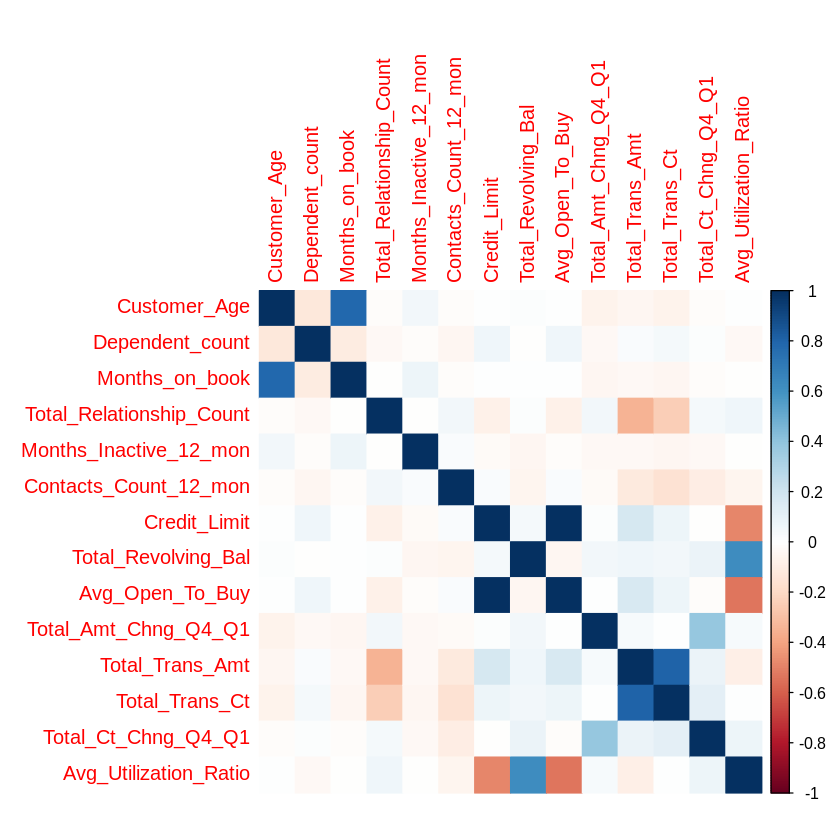

In [ ]:
# Visualizing the correlation matrix
corrplot(correlation_matrix, method = "color")

In [ ]:
# Checking the column names of the dataset
column_names <- names(encoded_data)
print(column_names)


 [1] "CLIENTNUM"                "Attrition_Flag"          
 [3] "Customer_Age"             "Gender"                  
 [5] "Dependent_count"          "Education_Level"         
 [7] "Marital_Status"           "Income_Category"         
 [9] "Card_Category"            "Months_on_book"          
[11] "Total_Relationship_Count" "Months_Inactive_12_mon"  
[13] "Contacts_Count_12_mon"    "Credit_Limit"            
[15] "Total_Revolving_Bal"      "Avg_Open_To_Buy"         
[17] "Total_Amt_Chng_Q4_Q1"     "Total_Trans_Amt"         
[19] "Total_Trans_Ct"           "Total_Ct_Chng_Q4_Q1"     
[21] "Avg_Utilization_Ratio"    "GenderF"                 
[23] "GenderM"                  "Marital_StatusMarried"   
[25] "Marital_StatusSingle"     "Marital_StatusUnknown"   


In [ ]:
# Renaming the columns names of the dataset
new_column_names <- c(
  "ClientNumber", "AttritionFlag", "Age", "Gender", "DependentCount",
  "EducationLevel", "MaritalStatus", "IncomeCategory", "CardCategory",
  "MonthsOnBook", "TotalRelationshipCount", "MonthsInactive12Mon",
  "ContactsCount12Mon", "CreditLimit", "TotalRevolvingBal",
  "AvgOpenToBuy", "TotalAmtChngQ4Q1", "TotalTransAmt", "TotalTransCt",
  "TotalCtChngQ4Q1", "AvgUtilizationRatio", "GenderF", "GenderM",
  "MaritalStatusMarried", "MaritalStatusSingle", "MaritalStatusUnknown"
)

colnames(encoded_data) <- new_column_names


In [ ]:
head(encoded_data)

,ClientNumber,AttritionFlag,Age,Gender,DependentCount,EducationLevel,MaritalStatus,IncomeCategory,CardCategory,MonthsOnBook,⋯,TotalAmtChngQ4Q1,TotalTransAmt,TotalTransCt,TotalCtChngQ4Q1,AvgUtilizationRatio,GenderF,GenderM,MaritalStatusMarried,MaritalStatusSingle,MaritalStatusUnknown
,<int>,<dbl>,<int>,<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<int>,⋯,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,768805383,0,45,M,3,2,Married,3,0,39,⋯,1.335,1144,42,1.625,0.061,0,1,1,0,0
2,818770008,0,49,F,5,4,Single,1,0,44,⋯,1.541,1291,33,3.714,0.105,1,0,0,1,0
3,713982108,0,51,M,3,4,Married,4,0,36,⋯,2.594,1887,20,2.333,0.000,0,1,1,0,0
4,769911858,0,40,F,4,2,Unknown,1,0,34,⋯,1.405,1171,20,2.333,0.760,1,0,0,0,1
5,709106358,0,40,M,3,1,Married,3,0,21,⋯,2.175,816,28,2.500,0.000,0,1,1,0,0
6,713061558,0,44,M,2,4,Married,2,0,36,⋯,1.376,1088,24,0.846,0.311,0,1,1,0,0


In [ ]:
# Selecting only the numerical features for correlation analysis
numerical_features <- encoded_data %>% select_if(is.numeric)

# Computing the correlation matrix
correlation_matrix <- cor(numerical_features)

# Printing the correlation matrix
print(correlation_matrix)


                        ClientNumber AttritionFlag          Age DependentCount
ClientNumber            1.0000000000 -0.0464304088  0.007612651   0.0067717372
AttritionFlag          -0.0464304088  1.0000000000  0.018203139   0.0189905963
Age                     0.0076126512  0.0182031385  1.000000000  -0.1222537520
DependentCount          0.0067717372  0.0189905963 -0.122253752   1.0000000000
EducationLevel         -0.0069463162  0.0087960076 -0.002369324   0.0004715004
IncomeCategory          0.0262952068 -0.0135772564  0.023507630   0.0662778466
CardCategory            0.0020860730  0.0023535755 -0.018234705   0.0304693188
MonthsOnBook            0.1345878309  0.0136868512  0.788912359  -0.1030622815
TotalRelationshipCount  0.0069069051 -0.1500052280 -0.010931069  -0.0390763890
MonthsInactive12Mon     0.0057285276  0.1524488063  0.054360999  -0.0107679185
ContactsCount12Mon      0.0056944278  0.2044905100 -0.018451855  -0.0405049598
CreditLimit             0.0057076227 -0.0238729948  

In [ ]:
# Finding highly correlated feature pairs
highly_correlated_pairs <- which(abs(correlation_matrix) > 0.8 & correlation_matrix != 1, arr.ind = TRUE)

# Printing the highly correlated pairs
print(highly_correlated_pairs)

              row col
AvgOpenToBuy   14  12
CreditLimit    12  14
TotalTransCt   17  16
TotalTransAmt  16  17
GenderM        21  20
GenderF        20  21


In [ ]:
# Swaping row and column indices in highly_correlated_pairs matrix
corrected_pairs <- highly_correlated_pairs[, c("col", "row")]

# Printing the corrected pairs
print(corrected_pairs)


              col row
AvgOpenToBuy   12  14
CreditLimit    14  12
TotalTransCt   16  17
TotalTransAmt  17  16
GenderM        20  21
GenderF        21  20


In [ ]:
#Mapping the new gender column (IsMale)
encoded_data$IsMale <- ifelse(encoded_data$Gender == "M", 1, 0)

# Removing the 'GenderF' and 'GenderM' columns
encoded_data <- encoded_data[, !(colnames(encoded_data) %in% c("GenderF", "GenderM"))]

# Printing a few rows of the updated dataset
head(encoded_data)


,ClientNumber,AttritionFlag,Age,Gender,DependentCount,EducationLevel,MaritalStatus,IncomeCategory,CardCategory,MonthsOnBook,⋯,AvgOpenToBuy,TotalAmtChngQ4Q1,TotalTransAmt,TotalTransCt,TotalCtChngQ4Q1,AvgUtilizationRatio,MaritalStatusMarried,MaritalStatusSingle,MaritalStatusUnknown,IsMale
,<int>,<dbl>,<int>,<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<int>,⋯,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,768805383,0,45,M,3,2,Married,3,0,39,⋯,11914,1.335,1144,42,1.625,0.061,1,0,0,1
2,818770008,0,49,F,5,4,Single,1,0,44,⋯,7392,1.541,1291,33,3.714,0.105,0,1,0,0
3,713982108,0,51,M,3,4,Married,4,0,36,⋯,3418,2.594,1887,20,2.333,0.000,1,0,0,1
4,769911858,0,40,F,4,2,Unknown,1,0,34,⋯,796,1.405,1171,20,2.333,0.760,0,0,1,0
5,709106358,0,40,M,3,1,Married,3,0,21,⋯,4716,2.175,816,28,2.500,0.000,1,0,0,1
6,713061558,0,44,M,2,4,Married,2,0,36,⋯,2763,1.376,1088,24,0.846,0.311,1,0,0,1


In [ ]:
# Getting rid of the Gender column
encoded_data <- encoded_data[, !(colnames(encoded_data) %in% c("Gender"))]

# Printing a few rows of the updated dataset
head(encoded_data)


,ClientNumber,AttritionFlag,Age,DependentCount,EducationLevel,MaritalStatus,IncomeCategory,CardCategory,MonthsOnBook,TotalRelationshipCount,⋯,AvgOpenToBuy,TotalAmtChngQ4Q1,TotalTransAmt,TotalTransCt,TotalCtChngQ4Q1,AvgUtilizationRatio,MaritalStatusMarried,MaritalStatusSingle,MaritalStatusUnknown,IsMale
,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,768805383,0,45,3,2,Married,3,0,39,5,⋯,11914,1.335,1144,42,1.625,0.061,1,0,0,1
2,818770008,0,49,5,4,Single,1,0,44,6,⋯,7392,1.541,1291,33,3.714,0.105,0,1,0,0
3,713982108,0,51,3,4,Married,4,0,36,4,⋯,3418,2.594,1887,20,2.333,0.000,1,0,0,1
4,769911858,0,40,4,2,Unknown,1,0,34,3,⋯,796,1.405,1171,20,2.333,0.760,0,0,1,0
5,709106358,0,40,3,1,Married,3,0,21,5,⋯,4716,2.175,816,28,2.500,0.000,1,0,0,1
6,713061558,0,44,2,4,Married,2,0,36,3,⋯,2763,1.376,1088,24,0.846,0.311,1,0,0,1


In [ ]:
# Displaying all column names
column_names <- names(encoded_data)
print(column_names)


 [1] "ClientNumber"           "AttritionFlag"          "Age"                   
 [4] "DependentCount"         "EducationLevel"         "MaritalStatus"         
 [7] "IncomeCategory"         "CardCategory"           "MonthsOnBook"          
[10] "TotalRelationshipCount" "MonthsInactive12Mon"    "ContactsCount12Mon"    
[13] "CreditLimit"            "TotalRevolvingBal"      "AvgOpenToBuy"          
[16] "TotalAmtChngQ4Q1"       "TotalTransAmt"          "TotalTransCt"          
[19] "TotalCtChngQ4Q1"        "AvgUtilizationRatio"    "MaritalStatusMarried"  
[22] "MaritalStatusSingle"    "MaritalStatusUnknown"   "IsMale"                


In [ ]:
# Creating a new feature: Credit Utilization
encoded_data <- encoded_data %>%
  mutate(CreditUtilization = AvgOpenToBuy / CreditLimit)


In [ ]:
head(encoded_data)

,ClientNumber,AttritionFlag,Age,DependentCount,EducationLevel,MaritalStatus,IncomeCategory,CardCategory,MonthsOnBook,TotalRelationshipCount,⋯,TotalAmtChngQ4Q1,TotalTransAmt,TotalTransCt,TotalCtChngQ4Q1,AvgUtilizationRatio,MaritalStatusMarried,MaritalStatusSingle,MaritalStatusUnknown,IsMale,CreditUtilization
,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<int>,⋯,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,768805383,0,45,3,2,Married,3,0,39,5,⋯,1.335,1144,42,1.625,0.061,1,0,0,1,0.9387755
2,818770008,0,49,5,4,Single,1,0,44,6,⋯,1.541,1291,33,3.714,0.105,0,1,0,0,0.8953488
3,713982108,0,51,3,4,Married,4,0,36,4,⋯,2.594,1887,20,2.333,0.000,1,0,0,1,1.0000000
4,769911858,0,40,4,2,Unknown,1,0,34,3,⋯,1.405,1171,20,2.333,0.760,0,0,1,0,0.2402656
5,709106358,0,40,3,1,Married,3,0,21,5,⋯,2.175,816,28,2.500,0.000,1,0,0,1,1.0000000
6,713061558,0,44,2,4,Married,2,0,36,3,⋯,1.376,1088,24,0.846,0.311,1,0,0,1,0.6890274


In [ ]:
#Installing required packages
install.packages("randomForest")
install.packages("rpart")
# Loading necessary libraries
library(randomForest)
library(rpart)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine




In [ ]:
# Converting the target variable to a factor
encoded_data$AttritionFlag <- as.factor(encoded_data$AttritionFlag)


In [ ]:
# Checking data types of all columns in the dataset
data_types <- sapply(encoded_data, class)

# Printing the data types
print(data_types)


          ClientNumber          AttritionFlag                    Age 
             "integer"               "factor"              "integer" 
        DependentCount         EducationLevel          MaritalStatus 
             "integer"              "numeric"            "character" 
        IncomeCategory           CardCategory           MonthsOnBook 
             "numeric"              "numeric"              "integer" 
TotalRelationshipCount    MonthsInactive12Mon     ContactsCount12Mon 
             "integer"              "integer"              "integer" 
           CreditLimit      TotalRevolvingBal           AvgOpenToBuy 
             "numeric"              "integer"              "numeric" 
      TotalAmtChngQ4Q1          TotalTransAmt           TotalTransCt 
             "numeric"              "integer"              "integer" 
       TotalCtChngQ4Q1    AvgUtilizationRatio   MaritalStatusMarried 
             "numeric"              "numeric"              "numeric" 
   MaritalStatusSing

In [ ]:
# Converting EducationLevel, MaritalStatus, IncomeCategory to factors
encoded_data$EducationLevel <- as.factor(encoded_data$EducationLevel)
encoded_data$MaritalStatus <- as.factor(encoded_data$MaritalStatus)
encoded_data$IncomeCategory <- as.factor(encoded_data$IncomeCategory)
encoded_data$CardCategory <- as.factor(encoded_data$CardCategory)

# Converting MaritalStatusMarried, MaritalStatusSingle, MaritalStatusUnknown to factors with 2 levels
encoded_data$MaritalStatusMarried <- as.factor(encoded_data$MaritalStatusMarried)
encoded_data$MaritalStatusSingle <- as.factor(encoded_data$MaritalStatusSingle)
encoded_data$MaritalStatusUnknown <- as.factor(encoded_data$MaritalStatusUnknown)

# Converting IsMale to a factor with 2 levels
encoded_data$IsMale <- as.factor(encoded_data$IsMale)


In [ ]:
# Checking data types of all columns in the dataset
data_types <- sapply(encoded_data, class)

# Printing the data types
print(data_types)

          ClientNumber          AttritionFlag                    Age 
             "integer"               "factor"              "integer" 
        DependentCount         EducationLevel          MaritalStatus 
             "integer"               "factor"               "factor" 
        IncomeCategory           CardCategory           MonthsOnBook 
              "factor"               "factor"              "integer" 
TotalRelationshipCount    MonthsInactive12Mon     ContactsCount12Mon 
             "integer"              "integer"              "integer" 
           CreditLimit      TotalRevolvingBal           AvgOpenToBuy 
             "numeric"              "integer"              "numeric" 
      TotalAmtChngQ4Q1          TotalTransAmt           TotalTransCt 
             "numeric"              "integer"              "integer" 
       TotalCtChngQ4Q1    AvgUtilizationRatio   MaritalStatusMarried 
             "numeric"              "numeric"               "factor" 
   MaritalStatusSing

In [ ]:
#Dropping redundant columns in the dataset
encoded_data$MaritalStatus <- NULL
encoded_data$ClientNumber <- NULL

In [ ]:
head(encoded_data)

,AttritionFlag,Age,DependentCount,EducationLevel,IncomeCategory,CardCategory,MonthsOnBook,TotalRelationshipCount,MonthsInactive12Mon,ContactsCount12Mon,⋯,TotalAmtChngQ4Q1,TotalTransAmt,TotalTransCt,TotalCtChngQ4Q1,AvgUtilizationRatio,MaritalStatusMarried,MaritalStatusSingle,MaritalStatusUnknown,IsMale,CreditUtilization
,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,⋯,<dbl>,<int>,<int>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>
1,0,45,3,2,3,0,39,5,1,3,⋯,1.335,1144,42,1.625,0.061,1,0,0,1,0.9387755
2,0,49,5,4,1,0,44,6,1,2,⋯,1.541,1291,33,3.714,0.105,0,1,0,0,0.8953488
3,0,51,3,4,4,0,36,4,1,0,⋯,2.594,1887,20,2.333,0.000,1,0,0,1,1.0000000
4,0,40,4,2,1,0,34,3,4,1,⋯,1.405,1171,20,2.333,0.760,0,0,1,0,0.2402656
5,0,40,3,1,3,0,21,5,1,0,⋯,2.175,816,28,2.500,0.000,1,0,0,1,1.0000000
6,0,44,2,4,2,0,36,3,1,2,⋯,1.376,1088,24,0.846,0.311,1,0,0,1,0.6890274



Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin




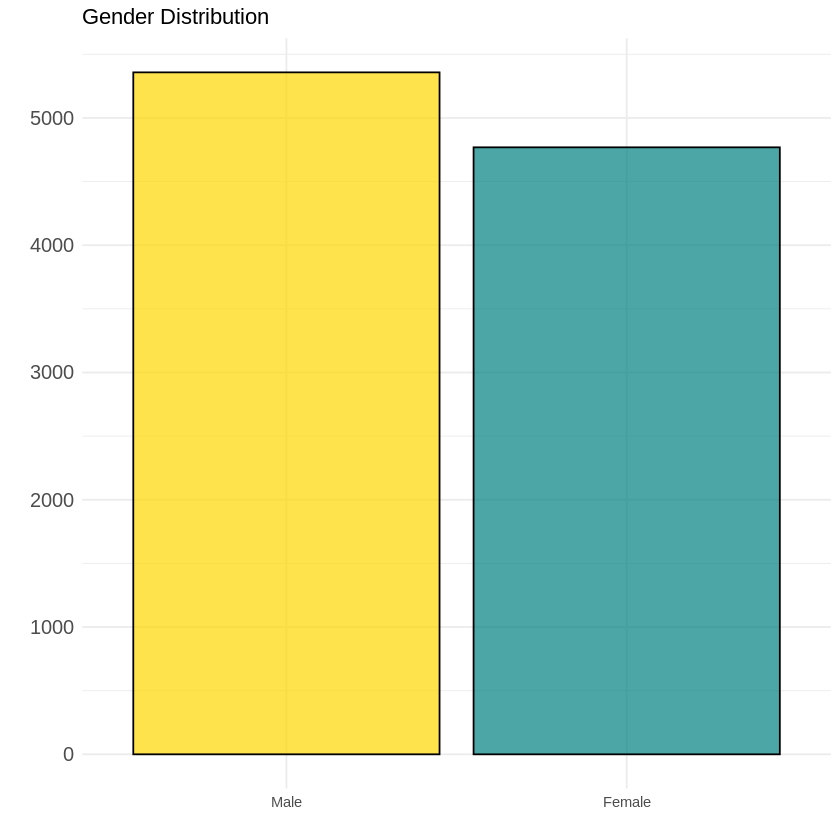

In [ ]:
# Load necessary libraries
library(ggplot2)

# Define custom color palette
custom_palette <- c('M' = '#008080', 'F' = '#FFD700')

# Create the count plot using ggplot2
plot <- ggplot(BankChurners, aes(x = Gender, fill = Gender)) +
  geom_bar(alpha = 0.7, color = 'black') +
  scale_fill_manual(values = custom_palette) +
  labs(x = '', y = '', title = 'Gender Distribution') +
  theme_minimal() +
  theme(axis.text.y = element_text(size = 12),
        legend.position = 'none') +
  scale_y_continuous(breaks = seq(0, max(table(BankChurners$Gender)), by = 1000)) +
  scale_x_discrete(labels = c('Male', 'Female'))

# Print the plot
print(plot)


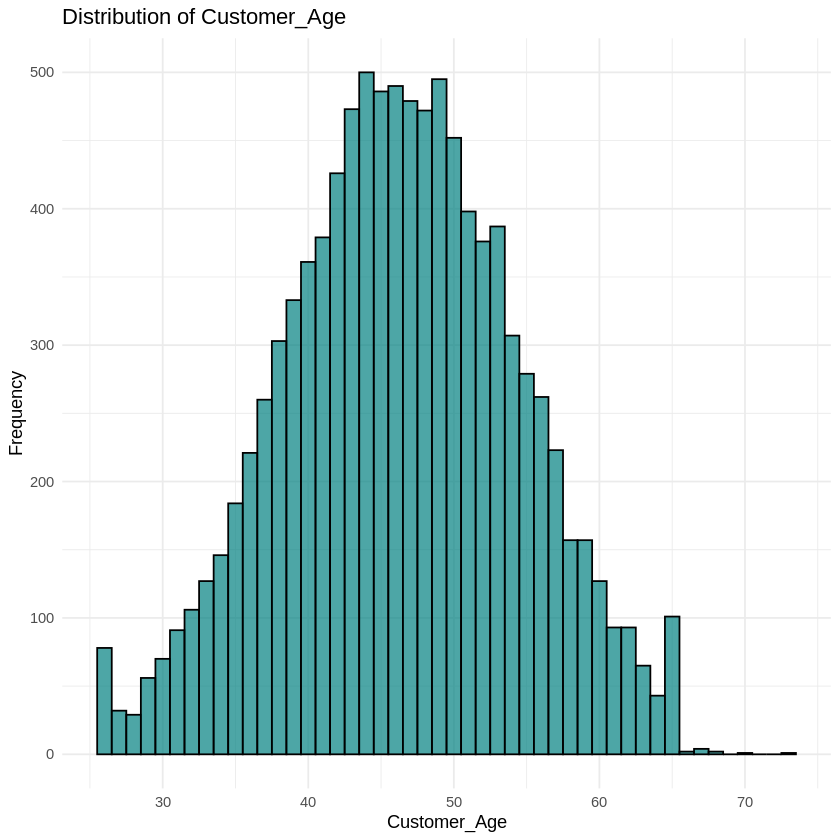

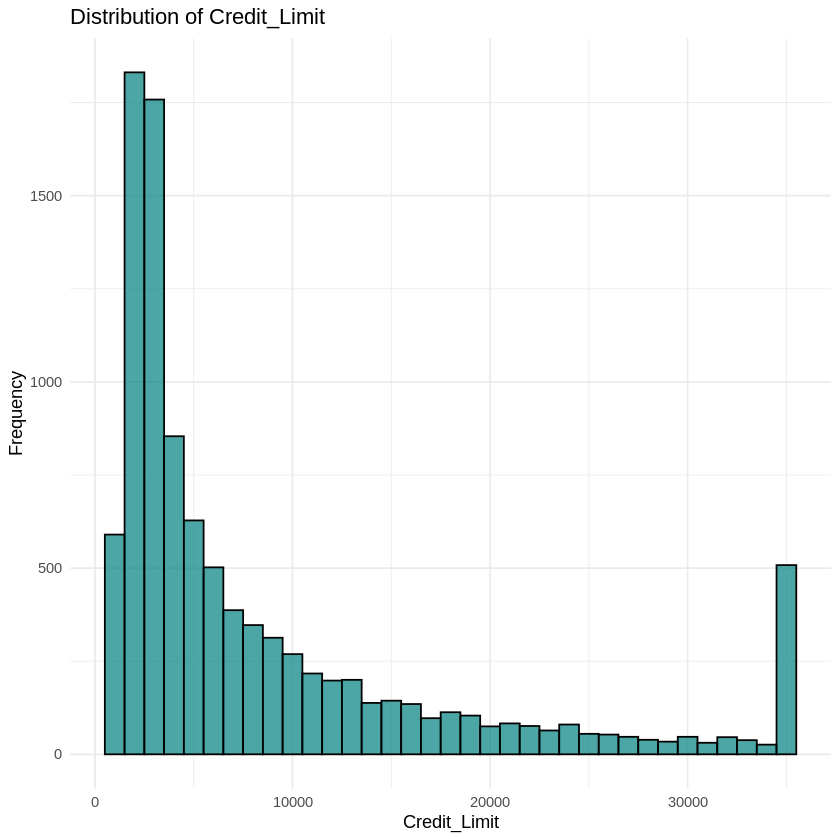

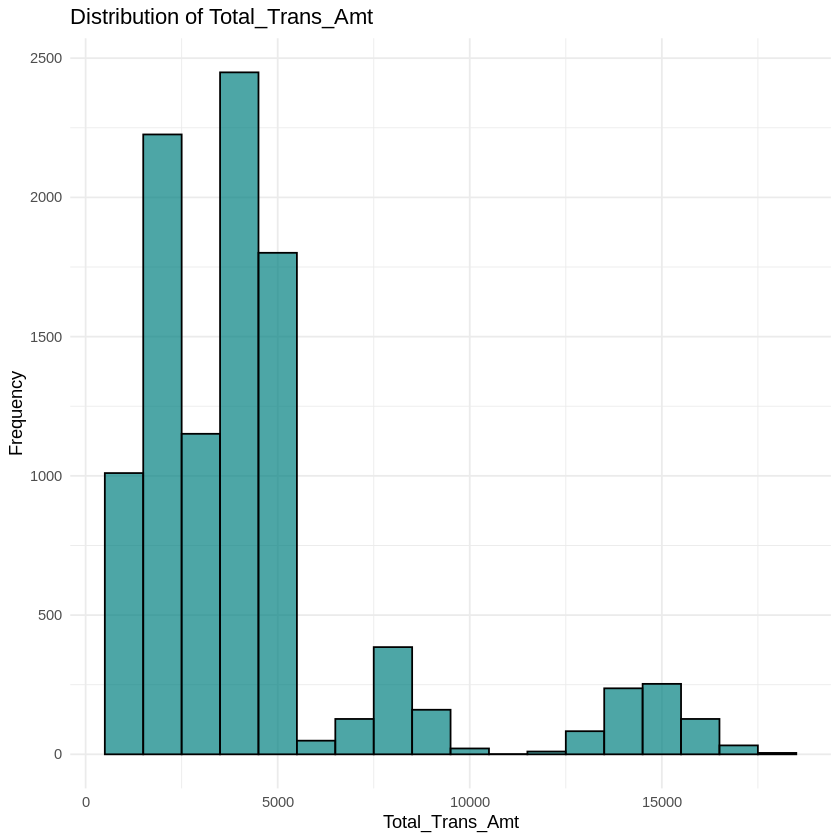

In [ ]:
# Load necessary library
library(ggplot2)

# Define the numeric variables for which histograms will be created
numeric_vars <- c('Customer_Age', 'Credit_Limit', 'Total_Trans_Amt')

# Create a list to store plots
plot_list <- list()

# Loop through the numeric variables
for (var in numeric_vars) {
  p <- ggplot(BankChurners, aes(x = .data[[var]])) +
    geom_histogram(binwidth = ifelse(var == 'Customer_Age', 1, 1000),
                   fill = '#008080', color = 'black', alpha = 0.7) +
    labs(x = var, y = 'Frequency', title = paste("Distribution of", var)) +
    theme_minimal()

  plot_list[[var]] <- p
}

# Print the plots
for (var in numeric_vars) {
  print(plot_list[[var]])
}


In [ ]:
install.packages("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Attaching package: ‘gridExtra’


The following object is masked from ‘package:randomForest’:

    combine


The following object is masked from ‘package:dplyr’:

    combine




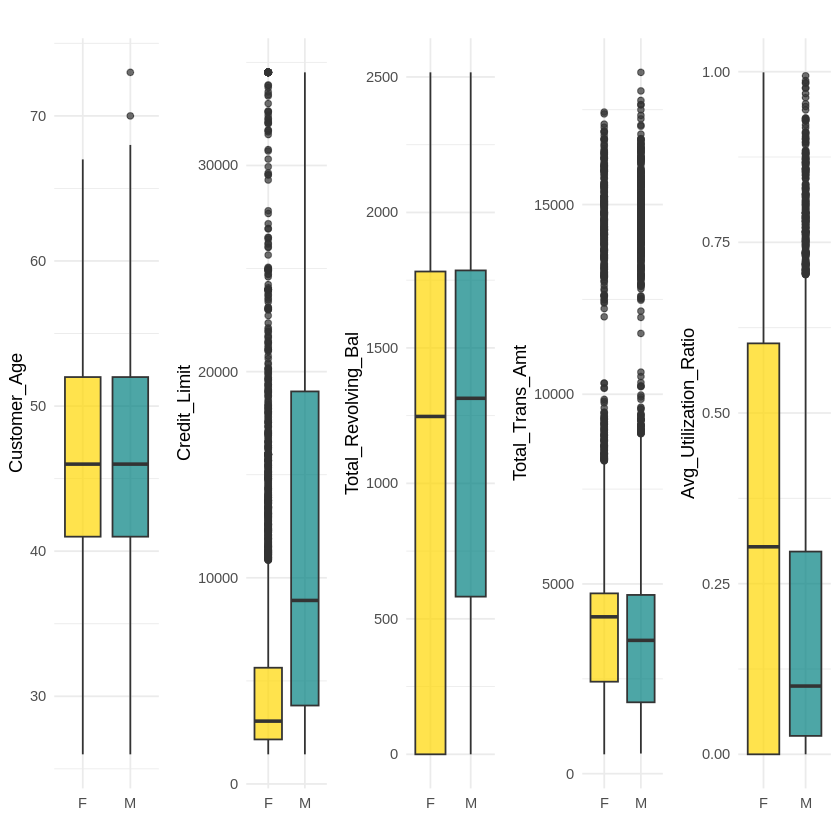

In [ ]:
# Load necessary libraries
library(ggplot2)
library(gridExtra)

# Define custom color palette
custom_palette <- c('M' = '#008080', 'F' = '#FFD700')  # Using color codes

# Create a list to store plots
plot_list <- list()

# Loop through the numeric variables
numeric_vars <- c('Customer_Age', 'Credit_Limit', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Avg_Utilization_Ratio')
for (i in seq_along(numeric_vars)) {
  var <- numeric_vars[i]
  p <- ggplot(BankChurners, aes(x = Gender, y = .data[[var]], fill = Gender)) +
    geom_boxplot(alpha = 0.7) +
    scale_fill_manual(values = custom_palette) +
    labs(x = '', y = var, title = '') +
    theme_minimal() +
    theme(legend.position = 'none', axis.text.x = element_text(angle = 0, vjust = 0.5))

  plot_list[[i]] <- p
}

# Arrange and print the plots
grid.arrange(grobs = plot_list, ncol = length(numeric_vars))


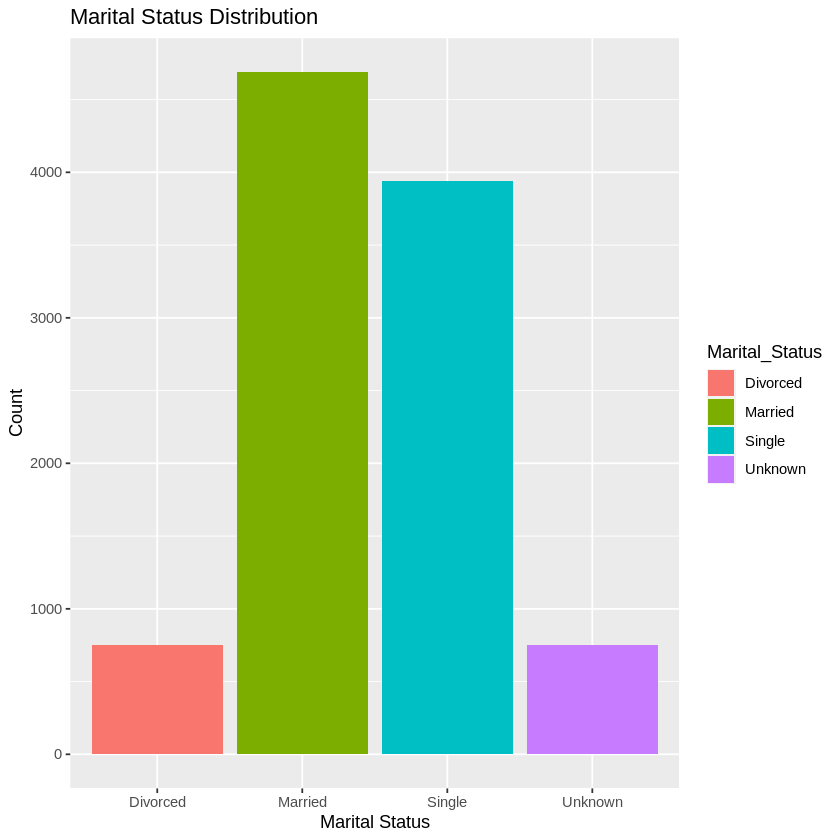

In [ ]:
# Count plot of Marital Status
ggplot(BankChurners, aes(x = Marital_Status, fill = Marital_Status)) +
  geom_bar() +
  labs(title = "Marital Status Distribution", x = "Marital Status", y = "Count")


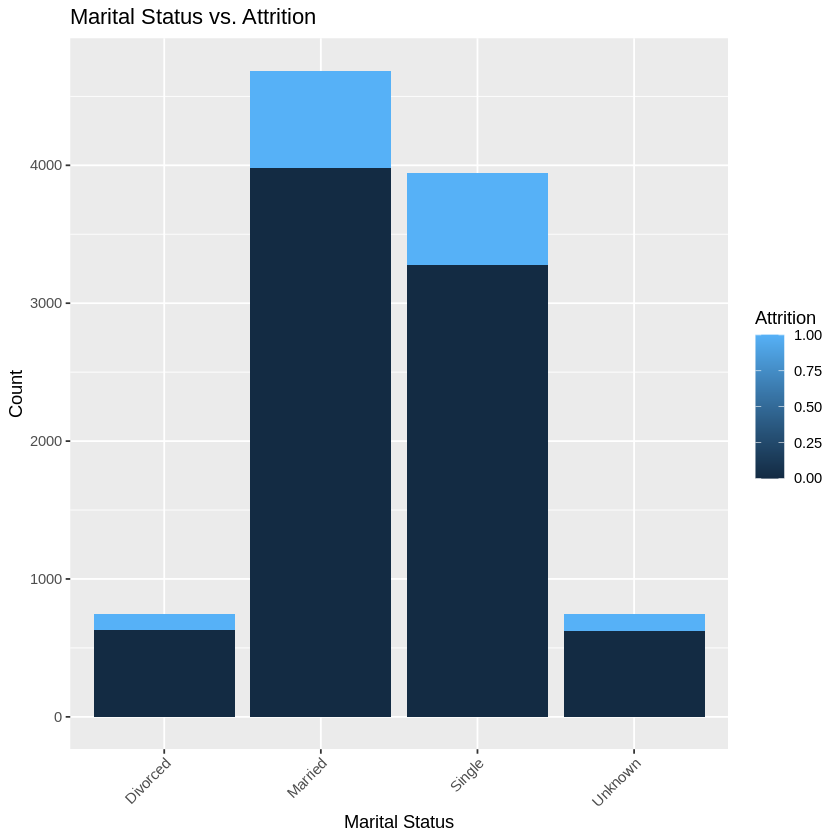

In [ ]:
# Create a data frame for marital status vs. attrition
marital_vs_attrition <- BankChurners %>%
  group_by(Marital_Status, Attrition_Flag) %>%
  summarise(Count = n(), .groups = "drop")

# Create a stacked bar plot
ggplot(marital_vs_attrition, aes(x = Marital_Status, y = Count, fill = Attrition_Flag)) +
  geom_bar(stat = "identity") +
  labs(title = "Marital Status vs. Attrition", x = "Marital Status", y = "Count", fill = "Attrition") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))




Classification Analysis & Results

In [ ]:
# Loading necessary libraries for feature importance task
library(randomForest)
library(rpart)

# Splitting the data into features (X) and target variable (y)
X <- encoded_data[, !colnames(encoded_data) %in% "AttritionFlag"]  # Exclude the target variable
y <- encoded_data$AttritionFlag  # Target variable

# Creating formula for the models
formula_rf <- as.formula(paste("AttritionFlag ~ ."))
formula_dt <- as.formula(paste("AttritionFlag ~ ."))

# Training a Random Forest model using the entire dataset
rf_model <- randomForest(formula = formula_rf, data = cbind(AttritionFlag = y, X))

# Training a Decision Tree model using the entire dataset
dt_model <- rpart(formula = formula_dt, data = cbind(AttritionFlag = y, X))

# Retrieving feature importance scores from the Random Forest model
rf_importance <- rf_model$importance

# Retrieving feature importance scores from the Decision Tree model
dt_importance <- dt_model$variable.importance

# Printing the importance scores
print(rf_importance)
print(dt_importance)

# Selecting features based on importance scores
num_features_to_keep <- 10  # Example: Keep the top 10 features

top_rf_features <- names(sort(rf_importance, decreasing = TRUE)[1:num_features_to_keep])
top_dt_features <- names(sort(dt_importance, decreasing = TRUE)[1:num_features_to_keep])

print(top_rf_features)
print(top_dt_features)


                       MeanDecreaseGini
Age                           84.119030
DependentCount                34.489517
EducationLevel                53.821034
IncomeCategory                45.666051
CardCategory                   7.581508
MonthsOnBook                  65.890955
TotalRelationshipCount       170.660128
MonthsInactive12Mon           66.506000
ContactsCount12Mon            71.963417
CreditLimit                   89.862004
TotalRevolvingBal            265.287017
AvgOpenToBuy                  79.420628
TotalAmtChngQ4Q1             164.368901
TotalTransAmt                492.588432
TotalTransCt                 453.602102
TotalCtChngQ4Q1              284.699837
AvgUtilizationRatio          123.168620
MaritalStatusMarried          14.048815
MaritalStatusSingle           10.024925
MaritalStatusUnknown           4.536248
IsMale                        20.451571
CreditUtilization            126.160236
          TotalTransCt          TotalTransAmt      TotalRevolvingBal 
          

In [ ]:
# Checking data types of all columns in the dataset
data_types <- sapply(encoded_data, class)

# Printing the data types
print(data_types)

         AttritionFlag                    Age         DependentCount 
              "factor"              "integer"              "integer" 
        EducationLevel         IncomeCategory           CardCategory 
              "factor"               "factor"               "factor" 
          MonthsOnBook TotalRelationshipCount    MonthsInactive12Mon 
             "integer"              "integer"              "integer" 
    ContactsCount12Mon            CreditLimit      TotalRevolvingBal 
             "integer"              "numeric"              "integer" 
          AvgOpenToBuy       TotalAmtChngQ4Q1          TotalTransAmt 
             "numeric"              "numeric"              "integer" 
          TotalTransCt        TotalCtChngQ4Q1    AvgUtilizationRatio 
             "integer"              "numeric"              "numeric" 
  MaritalStatusMarried    MaritalStatusSingle   MaritalStatusUnknown 
              "factor"               "factor"               "factor" 
                IsMa

In [ ]:
head(encoded_data)

,AttritionFlag,Age,DependentCount,EducationLevel,IncomeCategory,CardCategory,MonthsOnBook,TotalRelationshipCount,MonthsInactive12Mon,ContactsCount12Mon,⋯,TotalAmtChngQ4Q1,TotalTransAmt,TotalTransCt,TotalCtChngQ4Q1,AvgUtilizationRatio,MaritalStatusMarried,MaritalStatusSingle,MaritalStatusUnknown,IsMale,CreditUtilization
,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,⋯,<dbl>,<int>,<int>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>
1,0,45,3,2,3,0,39,5,1,3,⋯,1.335,1144,42,1.625,0.061,1,0,0,1,0.9387755
2,0,49,5,4,1,0,44,6,1,2,⋯,1.541,1291,33,3.714,0.105,0,1,0,0,0.8953488
3,0,51,3,4,4,0,36,4,1,0,⋯,2.594,1887,20,2.333,0.000,1,0,0,1,1.0000000
4,0,40,4,2,1,0,34,3,4,1,⋯,1.405,1171,20,2.333,0.760,0,0,1,0,0.2402656
5,0,40,3,1,3,0,21,5,1,0,⋯,2.175,816,28,2.500,0.000,1,0,0,1,1.0000000
6,0,44,2,4,2,0,36,3,1,2,⋯,1.376,1088,24,0.846,0.311,1,0,0,1,0.6890274


In [ ]:
#Creating a new dataset for the classification analysis based on feature importance
selected_columns <- c("AttritionFlag","Age","EducationLevel","IncomeCategory","DependentCount","MonthsOnBook","TotalRelationshipCount", "MonthsInactive12Mon", "MonthsInactive12Mon","ContactsCount12Mon", "CreditLimit", "TotalRevolvingBal","TotalAmtChngQ4Q1","TotalTransCt", "TotalCtChngQ4Q1", "CreditUtilization")
reduced_data <- encoded_data[, selected_columns]

In [ ]:
head(reduced_data)

,AttritionFlag,Age,EducationLevel,IncomeCategory,DependentCount,MonthsOnBook,TotalRelationshipCount,MonthsInactive12Mon,MonthsInactive12Mon.1,ContactsCount12Mon,CreditLimit,TotalRevolvingBal,TotalAmtChngQ4Q1,TotalTransCt,TotalCtChngQ4Q1,CreditUtilization
,<fct>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,0,45,2,3,3,39,5,1,1,3,12691,777,1.335,42,1.625,0.9387755
2,0,49,4,1,5,44,6,1,1,2,8256,864,1.541,33,3.714,0.8953488
3,0,51,4,4,3,36,4,1,1,0,3418,0,2.594,20,2.333,1.0000000
4,0,40,2,1,4,34,3,4,4,1,3313,2517,1.405,20,2.333,0.2402656
5,0,40,1,3,3,21,5,1,1,0,4716,0,2.175,28,2.500,1.0000000
6,0,44,4,2,2,36,3,1,1,2,4010,1247,1.376,24,0.846,0.6890274


In [ ]:
#installing a required package for classification task
install.packages("caret")
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: lattice



In [ ]:
# Setting a random seed for reproducing results
set.seed(123)

# Splitting data into training and test sets (70% train, 30% test)
train_indices <- createDataPartition(reduced_data$AttritionFlag, p = 0.7, list = FALSE)
train_data <- reduced_data[train_indices, ]
test_data <- reduced_data[-train_indices, ]


In [ ]:
# Loading necessary libraries for classification task
library(e1071)   # For SVM
library(rpart)   # For Decision Tree
library(randomForest)  # For Random Forest

# Training SVM
svm_model <- svm(AttritionFlag ~ ., data = train_data, kernel = "radial")

# Training Decision Tree
dt_model <- rpart(AttritionFlag ~ ., data = train_data)

# Training Random Forest
rf_model <- randomForest(AttritionFlag ~ ., data = train_data)


In [ ]:
# Predictions
svm_preds <- predict(svm_model, newdata = test_data)
dt_probs <- predict(dt_model, newdata = test_data, type = "prob")  # Get class probabilities
rf_preds <- predict(rf_model, newdata = test_data)

# Converting matrix predictions to class labels for Decision Tree
dt_preds_class <- ifelse(dt_probs[, "1"] > dt_probs[, "0"], 1, 0)

# Converting to factor with levels 0 and 1
dt_preds_class <- factor(dt_preds_class, levels = c(0, 1))

# Evaluating metrics (using confusionMatrix from the caret package)
library(caret)
svm_metrics <- confusionMatrix(svm_preds, test_data$AttritionFlag)
dt_metrics <- confusionMatrix(dt_preds_class, test_data$AttritionFlag)
rf_metrics <- confusionMatrix(rf_preds, test_data$AttritionFlag)

print(svm_metrics)
print(dt_metrics)
print(rf_metrics)


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 2502  186
         1   48  302
                                          
               Accuracy : 0.923           
                 95% CI : (0.9129, 0.9322)
    No Information Rate : 0.8394          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6775          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9812          
            Specificity : 0.6189          
         Pos Pred Value : 0.9308          
         Neg Pred Value : 0.8629          
             Prevalence : 0.8394          
         Detection Rate : 0.8236          
   Detection Prevalence : 0.8848          
      Balanced Accuracy : 0.8000          
                                          
       'Positive' Class : 0               
                        

In [ ]:
# Creating a function to calculate classification metrics
calculate_metrics <- function(preds, true_labels) {
  confusion_mat <- confusionMatrix(preds, true_labels)
  accuracy <- confusion_mat$overall["Accuracy"]
  precision <- confusion_mat$byClass["Pos Pred Value"]
  recall <- confusion_mat$byClass["Sensitivity"]
  f1_score <- confusion_mat$byClass["F1"]

  metrics <- c(Accuracy = accuracy, Precision = precision, Recall = recall, F1_Score = f1_score)
  return(metrics)
}

# Calculating metrics for each model
svm_metrics <- calculate_metrics(svm_preds, test_data$AttritionFlag)
dt_metrics <- calculate_metrics(dt_preds_class, test_data$AttritionFlag)
rf_metrics <- calculate_metrics(rf_preds, test_data$AttritionFlag)

# Printing metrics
print("SVM Metrics:")
print(svm_metrics)

print("Decision Tree Metrics:")
print(dt_metrics)

print("Random Forest Metrics:")
print(rf_metrics)

[1] "SVM Metrics:"
       Accuracy.Accuracy Precision.Pos Pred Value       Recall.Sensitivity 
               0.9229756                0.9308036                0.9811765 
             F1_Score.F1 
               0.9553265 
[1] "Decision Tree Metrics:"
       Accuracy.Accuracy Precision.Pos Pred Value       Recall.Sensitivity 
               0.9091508                0.9233060                0.9725490 
             F1_Score.F1 
               0.9472880 
[1] "Random Forest Metrics:"
       Accuracy.Accuracy Precision.Pos Pred Value       Recall.Sensitivity 
               0.9305464                0.9385077                0.9815686 
             F1_Score.F1 
               0.9595553 


In [ ]:
#Installing required package for visualization
install.packages("gplots")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’





Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




[1] "SVM Metrics:"
       Accuracy.Accuracy Precision.Pos Pred Value       Recall.Sensitivity 
               0.9229756                0.9308036                0.9811765 
             F1_Score.F1 
               0.9553265 


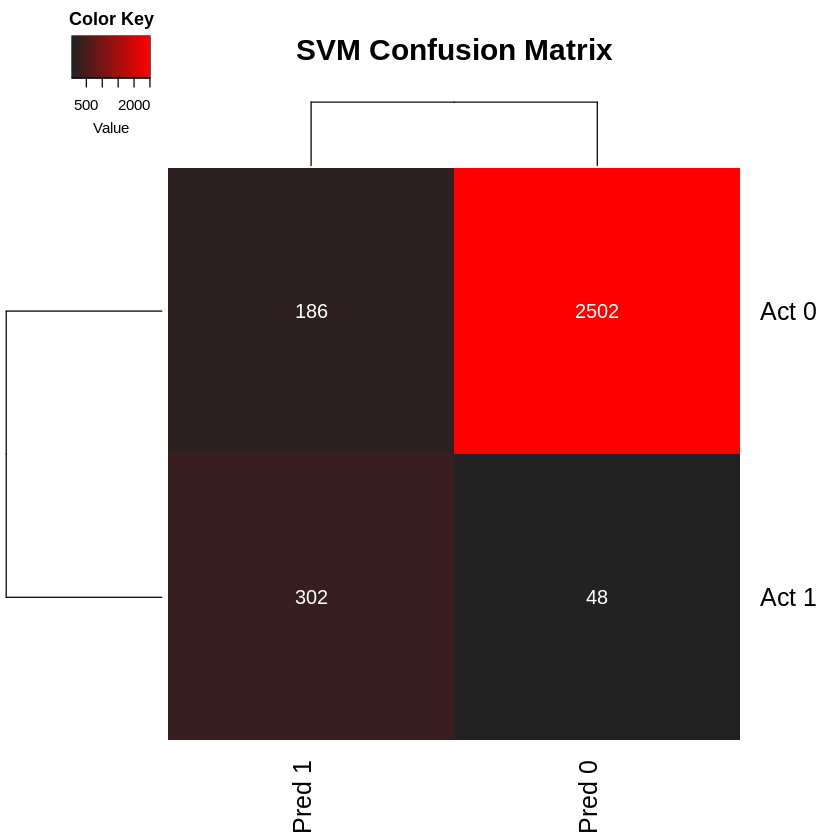

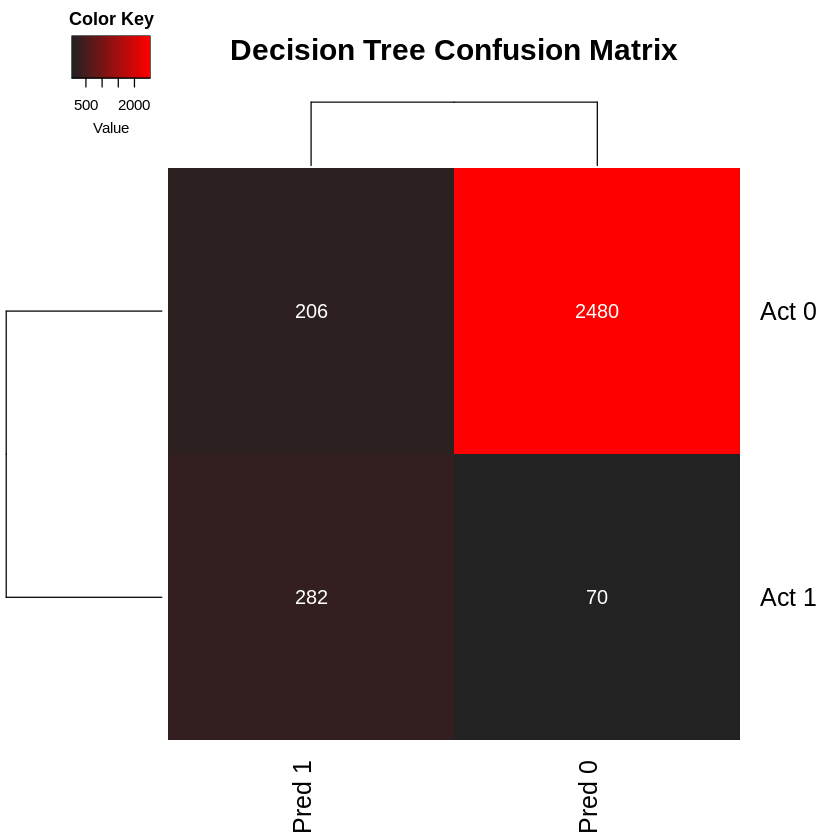

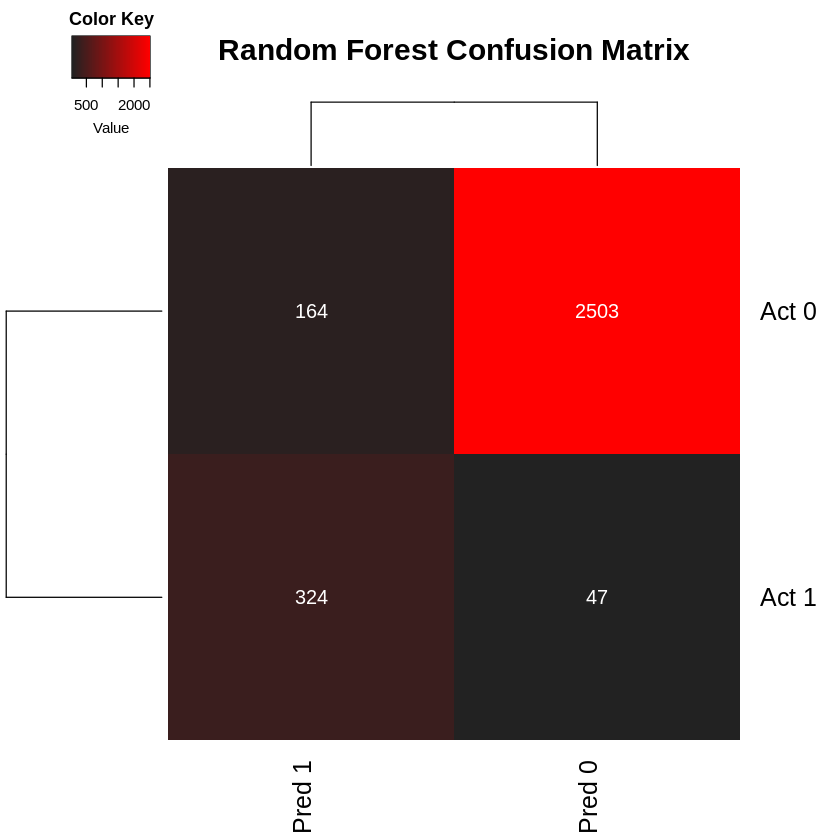

In [ ]:
# Loading the required library
library(gplots)

# Creating a function to plot the confusion matrix heatmap
plot_confusion_matrix <- function(cm, title) {
  cm_matrix <- as.table(matrix(c(cm$table[4], cm$table[3], cm$table[2], cm$table[1]), ncol = 2))
  colnames(cm_matrix) <- rownames(cm_matrix) <- c("Pred 1", "Pred 0")

  heatmap.2(cm_matrix, trace = "none", col = colorRampPalette(c("#222222", "red"))(100),
            main = title, density.info = "none", key = TRUE,
            labRow = c("Act 1", "Act 0"), labCol = c("Pred 1", "Pred 0"),
            cexRow = 1.5, cexCol = 1.5, keysize = 1.0, cellnote = cm_matrix,
            notecol = "white", notecex = 1.2, symkey = FALSE)
}

# Printing metrics
print("SVM Metrics:")
print(svm_metrics)

# Calculating the confusion matrix for SVM
svm_cm <- confusionMatrix(svm_preds, test_data$AttritionFlag)

# Plotting the confusion matrix heatmap for SVM
plot_confusion_matrix(svm_cm, "SVM Confusion Matrix")

# Repeating the same process for Decision Tree and Random Forest
# Calculating confusion matrices
dt_cm <- confusionMatrix(dt_preds_class, test_data$AttritionFlag)
rf_cm <- confusionMatrix(rf_preds, test_data$AttritionFlag)

# Plotting confusion matrix heatmaps
plot_confusion_matrix(dt_cm, "Decision Tree Confusion Matrix")
plot_confusion_matrix(rf_cm, "Random Forest Confusion Matrix")
